<a href="https://colab.research.google.com/github/piaobenauf/BigDataDataScience/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Der Schweizer Immobilienmarkt


Im Immobilienmarkt, speziell bei Wohnungen, zeigt sich eine große Vielfalt an Mietpreisen und Verfügbarkeiten. In der Schweiz, bekannt für ihre hohe Lebensqualität und entsprechend hohe Wohnkosten, bietet der Mietmarkt eine breite Palette an Wohnmöglichkeiten. Parallel dazu hat sich der Markt für kurzfristige Vermietungen, wie Airbnb, ebenfalls etabliert, was eine interessante Dynamik zwischen traditionellem Wohnraum und temporären Aufenthalten schafft.

Beispielsweise variieren die Mietpreise für Wohnungen stark je nach Lage, Größe und Ausstattung. In Zürich, einer der teuersten Städte, können die Mieten besonders hoch ausfallen. Die Daten zeigen, dass eine durchschnittliche 3-Zimmer-Wohnung in Zürich mehrere Tausend Franken pro Monat kosten kann.

Parallel dazu hat die Popularität von Airbnb in der Schweiz zugenommen, was zu einer interessanten Alternative sowohl für Touristen als auch für kurzfristig Suchende geführt hat. Diese Plattform ermöglicht es Eigentümern, ihre Wohnungen oder Zimmer temporär zu vermieten, was oft höhere Einnahmen als bei langfristigen Mietverträgen verspricht. Die Preisgestaltung bei Airbnb-Unterkünften hängt von verschiedenen Faktoren ab, einschließlich der Lage, der Saison und der Ausstattung des Angebots.

Sie haben nun eine Wohnung zu vermieten und Fragen sich, ob es sinnvoller ist, diese auf dem regulären Mietmarkt anzubieten oder AirBnB zu vermarkten.

Um die Preisgestaltung und die Dynamik zwischen dem traditionellen Mietmarkt und dem Airbnb-Markt besser zu verstehen, möchten Sie auf Ihr neu erworbenes Data Science Wissen zurückgreifen.

Im Rahmen einer Datenanalyse könnten folgende Variablen von Interesse sein:

| Feature       | Beschreibung                            |
|---------------|-----------------------------------------|
| Preis         | Gesamtmietpreis der Wohnung in CHF      |
| Zimmer        | Anzahl der Zimmer in der Wohnung        |
| Fläche        | Wohnfläche in Quadratmetern             |
| Strasse       | Straßenname und Hausnummer der Wohnung  |
| Postleitzahl  | Postleitzahl des Wohnortes              |
| Stadt         | Stadt, in der sich die Wohnung befindet |
| Ammenities    | Liste der Ausstattungsmerkmale          |
| Average_Miete_proM2_Postleitzahl  | Durchschnittlicher Mietpreis pro Quadratmeter in CHF bei Wohnungen an dieser Postleitzahl       |


Die Daten stammen von Homegate.ch, Immomapper.ch und einem öffentlichen AirBnB Listing (gesammelt und aufbereitet von Boris Szelcsanyi, Fabio Caramaschi, Lorena Raichle, Vanessa Nadine Hoppler)

Anmerkung: Google Drive connecten und relevante Libaries importieren

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Big Data und Data Analytics/Assignements/Assignment 1/"

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


## 1) Lesen Sie das Datenset ein. Wie viele Variablen und Instances umfasst der Datenset. Welche Datentypen sind vorhanden? Was ist der Unterschied zwischen diesen?

Hinweis: Csv-Dateien müssen nicht zwangsläufig per Komma getrennte Werte aufweise. Es sind auch andere Trennzeichen möglich (z.B. ";" oder Tabulator-Einrückungen).

In [ ]:
rent = pd.read_csv(path + "rent-data.csv")
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Preis                             1377 non-null   float64
 1   Zimmer                            1377 non-null   float64
 2   Fläche                            1377 non-null   float64
 3   Strasse                           1377 non-null   object 
 4   Postleitzahl                      1377 non-null   int64  
 5   Stadt                             1377 non-null   object 
 6   Ammenities                        1377 non-null   object 
 7   Average_Miete_proM2_Postleitzahl  1377 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 86.2+ KB


Das Dataset hat 8 Variablen und 1648 Instanzen. Es gibt ingesamt 5 *float* Variablen und 3 *object* Variablen. Diese zwei verschiedenen Datatypes unterschieden sich dadurch, dass *float* Mehrkommazahlen repräsentiert und *objects* Text oder gemischte Datentypen.





## 2) Wandeln Sie Variablen um, die sinvollerweise als Datentyp "Object" verfügbar sein sollten.

Hinweis: mit der Methode .astype() kann man den Typ von Variablen in einem DataFrame einfach umwandeln. Das Argument ist dann der Datentyp in den man umwandeln möchte.

Beispiel: dataframe["variable"] = dataframe["variable"].astype(float)

In [ ]:
rent["Postleitzahl"] = rent["Postleitzahl"].astype(object)

## 3) Was ist die durchschnittliche Miete in Zürich?

In [ ]:
durschnittliche_miete = rent["Preis"].mean()
print(durschnittliche_miete)

3181.5352214960058


## 4) Was ist die Adresse der teuersten Wohnung, die sich mieten lässt?

In [ ]:
teuerste_wohnung = rent.loc[rent["Preis"].idxmax()] # Source for idmax() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html
adresse = teuerste_wohnung["Strasse"] + ", " + str(teuerste_wohnung["Postleitzahl"]) + " " + teuerste_wohnung["Stadt"]
print(adresse)

Oetenbachgasse 22, 8001 Zürich


## 5) Erstellen Sie ein Histogramm für die Variable "Average_Miete_proM2_Postleitzahl". Beschreiben Sie die Verteilung der Average_Miete_proM2_Postleitzahl

<Axes: >

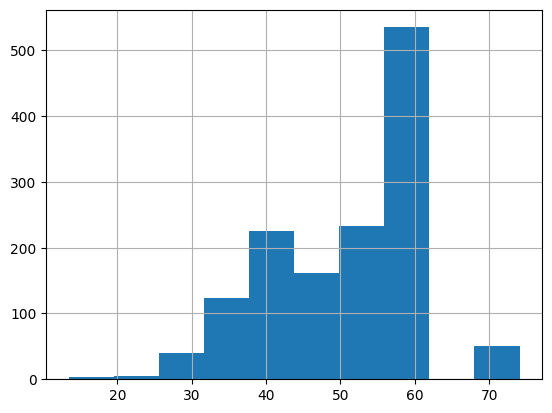

In [ ]:
rent["Average_Miete_proM2_Postleitzahl"].hist()

Das Histogramm zeigt, dass es eine recht große Anzahl von Angeboten im unteren Preissegment gibt (niedrigste Balken links), dann einige weniger in den mittleren Preisklassen und wieder mehr in einer höheren Preisklasse, bevor die Anzahl in der höchsten Preisklasse (rechter Balken) wieder stark abfällt.

## 6)	Erstellen Sie einen Scatterplot zwischen "Preis" und "Average_Miete_proM2_Postleitzahl". Wie würden sie den Zusammenhang beschreiben? Ermitteln Sie zusätzlich den Korrelationskoeffzienten? Wie ist dieser zur Interpretieren?

<Axes: xlabel='Average_Miete_proM2_Postleitzahl', ylabel='Preis'>

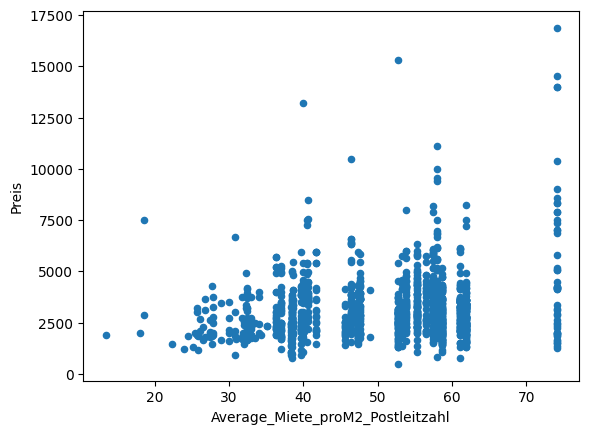

In [ ]:
rent.plot(kind="scatter", x="Average_Miete_proM2_Postleitzahl", y="Preis")

In [ ]:
# corr() aus der Vorlesung
rent.corr()

<ipython-input-10-1b75735d3ff8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rent.corr()


,Preis,Zimmer,Fläche,Average_Miete_proM2_Postleitzahl
Preis,1.000000,0.525282,0.626821,0.191130
Zimmer,0.525282,1.000000,0.834111,-0.223229
Fläche,0.626821,0.834111,1.000000,-0.227495
Average_Miete_proM2_Postleitzahl,0.191130,-0.223229,-0.227495,1.000000


Korrelationskoeffizient is 0.191130. Das heisst wir sehen hier einen schwach positiven linearen Zusammenhang.

## 7) Entfernen Sie Variablen die wir noch nicht verwenden können für eine Preisvorhersage

In [ ]:
rent = rent.drop(["Ammenities", "Strasse" , "Stadt", "Postleitzahl"], axis = 1)
rent.head()

,Preis,Zimmer,Fläche,Average_Miete_proM2_Postleitzahl
0,1950.0,2.0,75.0,58.701345
1,1640.0,1.5,40.0,47.344255
2,2051.0,3.0,59.0,40.033191
3,3850.0,2.5,72.0,53.765652
4,3030.0,2.0,70.0,52.771184


## 8) Erstellen Sie jeweils einen Trainings- und einen Testdatensatz  für die Daten. Das Trainingsdatenset soll die ersten 70% der Instanzen umfassen. Die Testdaten die restlichen 30%.

In [ ]:
n = rent.shape[0]
instance = round(n*0.7, 0)

In [ ]:
rent_train = rent.loc[0:instance,:]
rent_test = rent.loc[instance+1:,:]

## 9) Erstellen Sie ein Regressionsmodell mit dem Sie den Preis in einer Wohnung vorhersagen! Welche Variablen haben einen relevanten Einfluss auf den Preis?

In [ ]:
y = rent_train["Preis"]
X = rent_train[["Zimmer" , "Fläche" , "Average_Miete_proM2_Postleitzahl"]]

X = sm.add_constant(X, prepend=False)
model  = sm.OLS(y, X)

model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     269.1
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          9.57e-127
Time:                        18:11:12   Log-Likelihood:                -7968.6
No. Observations:                 965   AIC:                         1.595e+04
Df Residuals:                     961   BIC:                         1.596e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Zimmer  

Anhand des p-Werts lässt sich erkennen, dass die Fläche und die Average_Miete_proM2_Postleitzahl einen signifikanten Einfluss auf den Preis haben. Die Anzahl der Zimmer ist grösser als 0.05 und somit nicht siginifikant. Das lässt sich auch dadurch erkennen, dass wenn man die Variable Zimmer aus dem Regressionsmodell ausschliesst, immer noch der gleiche WErt für R^2 0.45 ausgegeben wird (das modell also noch gleich gut erklärt wird).

## 10) Lesen Sie außerdem die AirBnB Daten ein, stellen den korrekten Datentyp für alle Variablen sicher, entfernen alle Variablen mit dem Datentyp String und erstellen einen Test- und Trainingsdatensatz

In [ ]:
airbnb = pd.read_csv(path + "airbnb.csv")
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Features                          1648 non-null   object 
 1   Zimmer                            1648 non-null   float64
 2   Stadt                             1648 non-null   object 
 3   Postleitzahl                      1648 non-null   float64
 4   Preis                             1648 non-null   float64
 5   Adresse                           1648 non-null   object 
 6   Fläche                            1648 non-null   float64
 7   Average_Miete_proM2_Postleitzahl  1648 non-null   float64
dtypes: float64(5), object(3)
memory usage: 103.1+ KB


In [ ]:
airbnb["Postleitzahl"] = airbnb["Postleitzahl"].astype(object)
airbnb = airbnb.drop(["Features", "Adresse" , "Stadt", "Postleitzahl"], axis = 1)
rent.head()

,Preis,Zimmer,Fläche,Average_Miete_proM2_Postleitzahl
0,1950.0,2.0,75.0,58.701345
1,1640.0,1.5,40.0,47.344255
2,2051.0,3.0,59.0,40.033191
3,3850.0,2.5,72.0,53.765652
4,3030.0,2.0,70.0,52.771184


## 11) Erstellen Sie ein Regressionsmodell mit dem Sie den Preis in einer AirBnB Wohnung vorhersagen! Vergleichen Sie dies mit dem regulären Wohnungmarkt.

In [ ]:
n = airbnb.shape[0]
instance = round(n*0.7, 0)
airbnb_train = airbnb.loc[0:instance,:]
airbnb_test = airbnb.loc[instance+1:,:]

y = airbnb_train["Preis"]
X = airbnb_train[["Zimmer", "Fläche" , "Average_Miete_proM2_Postleitzahl"]]

X = sm.add_constant(X, prepend=False)
model2  = sm.OLS(y, X)

model2 = model2.fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     145.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           4.81e-57
Time:                        18:18:05   Log-Likelihood:                -11586.
No. Observations:                1155   AIC:                         2.318e+04
Df Residuals:                    1152   BIC:                         2.319e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Zimmer  

Im Vergleich ist der Preis eines Airbnbs weniger gut bestimmbar wie der einer Zürcher Wohnung, da R^2 nur bei 0.202 liegt. Eine Hypthese hierfür wäre, dass am Airbnb Markt auch andere Variablen einen starken Einfluss haben, die in diesem Modell nicht berücksichtig werden (beispielsweise Saison und Nebensaison).
Gleich wie am Wohnungsmarkt lässt sich über die Fläche und die Average_Miete_proM2_Postleitzahl der Preis bestimmen, jedoch ist zusätzlich ebenfalls die Variable Zimmer signfikant.

## 12) Vergleichen Sie die RMSE-Werte Ihrer Modelle. Wie gross ist die Unsicherheit, die mit Ihrer Entscheidung (regulärer Mietmarkt vs. AirBnB) einhergeht?

In [ ]:
### Wohnungsmarkt ####
y_test1= rent_test["Preis"]
X_test1 = rent_test[["Zimmer" , "Fläche" , "Average_Miete_proM2_Postleitzahl"]]

X_test1 = sm.add_constant(X_test1, prepend=False)
preds = model.predict(X_test1)

RMSE_rent = np.sqrt(np.mean((preds - y_test1)**2))

print(RMSE_rent)

### Airbnb ###

y_test2= airbnb_test["Preis"]
X_test2 = airbnb[["Zimmer" , "Fläche" , "Average_Miete_proM2_Postleitzahl"]]

X_test2 = sm.add_constant(X_test2, prepend=False)
preds = model.predict(X_test2)

RMSE_rent = np.sqrt(np.mean((preds - y_test2)**2))

print(RMSE_rent)

1357.486398193816
4430.141890758069


Im Durschnitt weicht der vorhergesagt Preis im Wohnungsmarkt um 1357 CHF vom tatsächlich Wert ab, während es beim Airbnb Data Set 4430 CHF sind. Das heisst, dass der RMSE für den Wohnungsmarkt kleiner ist als der für Airbnbs, und somit Airbnbs  mit grösseren durschnittlichen Abweichungen  vorhergesagt werden – also ungenauer sind.

## 13) Was ist der zu erwartenden Mietpreis für Ihre Wohnung auf AirBnB und dem regulären Mietmarkt? Für Welche Option entscheiden sie sich?

In [ ]:
meine_wohnung = pd.DataFrame({
    'Zimmer': [2],
    'Fläche': [50],
    'Average_Miete_proM2_Postleitzahl': [153],
    "const" : [1] # Hier hatte ich lange einen Fehler und habe Unterstützung eines Mitstudierenden bekommmen. Mein Fehler war, dass ich die Const immer in die erste Spalte gesetzt habe.
})

print(meine_wohnung)

   Zimmer  Fläche  Average_Miete_proM2_Postleitzahl  const
0       2      50                               153      1


In [ ]:
vorhergesagter_preis_wohnung = model.predict(meine_wohnung)
vorhergesagter_preis_wohnung

0    6726.599638
dtype: float64

In [ ]:
vorhergesagter_preis_airbnb = model2.predict(meine_wohnung)
vorhergesagter_preis_airbnb

0    6387.81657
dtype: float64

Ich entscheide mich für den Wohnungsmarkt, da ich hier eine höhere Miete verlangen kann. Allerdings muss ich auch beachten, dass signifikante Variablen für die Airbnb Preisbestimmung evtl nicht berücksichtigt worden sind, und der vorhergesagte Preis evtl einer grossen Abweichung unterliegt. Es empfiehlt sich Variablen wie die Saison mit aufzunehmen und die Vorhersage zu wiederholen.

# Optional - Nicht teil der Bewertung

## 14) Ändert sich die Qualität der Vorhersagen, wenn wir Ashenfelter's statistischen Trick anwenden?

## 15) Ändert sich die Qualität der Vorhersage, wenn wir die Objekte in Dummies umwandeln?